In [1]:
from Matrix import *

m = np.array([[1, 2], [3, 4], [5, 6]])
U, S, Vt = SVD(m)

In [2]:
print(f"{U=} \n{S=} \n{Vt=}")

U=array([[-0.2298477 ,  0.88346102,  0.40824829],
       [-0.52474482,  0.24078249, -0.81649658],
       [-0.81964194, -0.40189603,  0.40824829]]) 
S=array([[9.52551809, 0.        ],
       [0.        , 0.51430058],
       [0.        , 0.        ]]) 
Vt=array([[-0.61962948, -0.78489445],
       [-0.78489445,  0.61962948]])


In [3]:
image_matrix = np.array([
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0],
    [0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0],
    [0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0],
    [0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0],
    [0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0],
    [0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0],
    [0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0],
    [0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
])

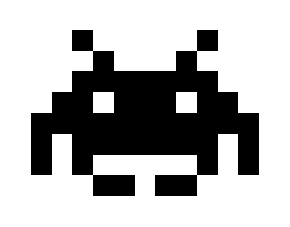

In [4]:
import matplotlib.pyplot as plt

plt.figure(figsize=(3,3))
plt.imshow(image_matrix[:], cmap='binary')
plt.axis('off')  
plt.tight_layout() 

In [5]:
U,S,Vt=SVD(image_matrix)

In [6]:
low=[]
for i in range(U.shape[-1]):
    l=np.outer(U[:,i],Vt[i])
    low.append(l*S[i,i])

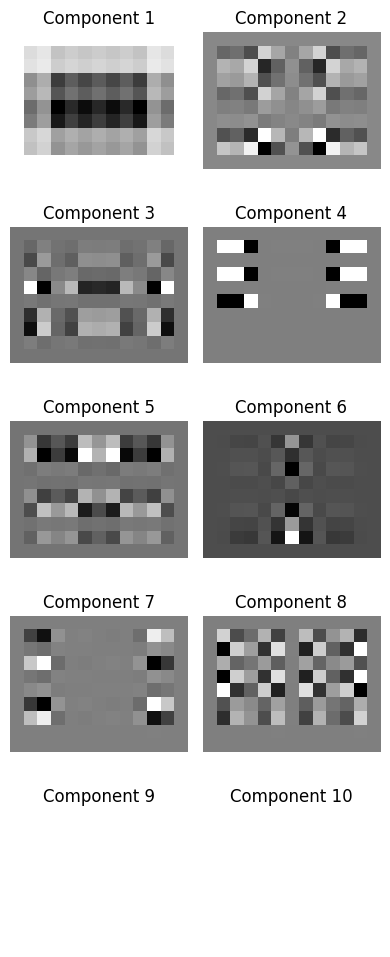

In [7]:
num_rows = max((U.shape[-1] ) // 2 ,1)
num_cols = min(2, (U.shape[-1]))  
fig, axes = plt.subplots(num_rows, num_cols, figsize=(2*num_cols, 2*num_rows))
axes = axes.flatten() if num_rows > 1 or num_cols > 1 else [axes]
axes.flatten()

for i in range(U.shape[-1]):
    ax = axes[i]
    im = ax.imshow(low[i], cmap='binary')
    ax.set_title(f'Component {i+1}')
    ax.axis('off')

plt.tight_layout()
plt.show()

In [8]:
import torch
low=torch.tensor(low)

C:\Users\aadit\AppData\Local\Temp\ipykernel_61552\237822594.py:2: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ..\torch\csrc\utils\tensor_new.cpp:278.)
  low=torch.tensor(low)


In [9]:
low.shape

torch.Size([10, 10, 13])

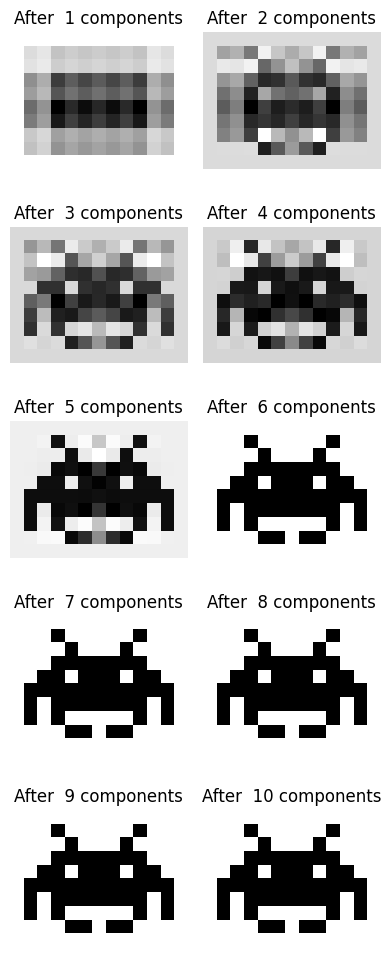

In [10]:
def combine_components(mat, no_of_components):
    num_rows = max((no_of_components ) // 2 ,1)
    num_cols = min(2, no_of_components)  
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(2*num_cols, 2*num_rows))
    axes = axes.flatten() if num_rows > 1 or num_cols > 1 else [axes]

    for i in range(1, no_of_components + 1):
        l = mat[:i].sum(dim=0)
    
        ax = axes[i-1]
        ax.imshow(l, cmap='binary')
        ax.set_title(f"After  {i} components")
        ax.axis('off')

    plt.tight_layout()
    plt.show()

combine_components(low,10)

In [11]:
import torch

def compress_image(image_matrix, max_components, display_steps=False):
    
    if display_steps:
        # Step 1: Perform SVD
        print("Step 1: Performing Singular Value Decomposition")
    U, S, Vt = SVD(image_matrix)
    
    if display_steps:
        plt.figure(figsize=(2, 2))
        plt.imshow(image_matrix[:], cmap='binary')
        plt.title("Original Image")
        plt.axis('off')
        plt.show()
    
    if display_steps:
        # Step 2: Generate individual components
        print("Step 2: Generating individual components")
    components = []
    for i in range(min(U.shape[-1], max_components)):
        component = np.outer(U[:, i], Vt[i]) * S[i, i]
        components.append(component)
    
    if display_steps:
        num_rows = max((len(components)) // 2, 1)
        num_cols = min(2, len(components))
        fig, axes = plt.subplots(num_rows, num_cols, figsize=(2*num_cols, 2*num_rows))
        axes = axes.flatten() if num_rows > 1 or num_cols > 1 else [axes]
        
        for i, component in enumerate(components):
            ax = axes[i]
            ax.imshow(component, cmap='binary')
            ax.set_title(f'Component {i+1}')
            ax.axis('off')
        
        plt.tight_layout()
        plt.show()

    
    components_array = np.array(components)
    if display_steps:
        # Step 3: Display cumulative reconstruction
        print("Step 4: Displaying cumulative reconstruction")
        num_rows = max((len(components)) // 2, 1)
        num_cols = min(2, len(components))
        fig, axes = plt.subplots(num_rows, num_cols, figsize=(2*num_cols, 2*num_rows))
        axes = axes.flatten() if num_rows > 1 or num_cols > 1 else [axes]
        
        
        for i in range(1, len(components) + 1):
            reconstructed = np.sum(components_array[:i], axis=0)
            
            ax = axes[i-1]
            ax.imshow(reconstructed, cmap='binary')
            ax.set_title(f"After {i} components")
            ax.axis('off')
        
        plt.tight_layout()
        plt.show()
    
    if display_steps:
        # Step 4: Calculate and display compression ratios
        print("Step 5: Calculating compression ratios")
        original_size = image_matrix[:].shape[0] * image_matrix[:].shape[1]
        for i in range(1, len(components) + 1):
            compressed_size = i * (U.shape[0] + Vt.shape[1] + 1)
            compression_ratio = original_size / compressed_size
            print(f"Compression ratio with {i} components: {compression_ratio:.2f}")
        
    return components_array



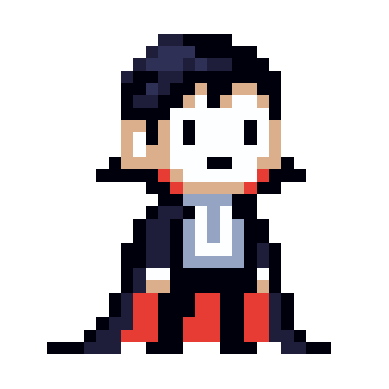

In [12]:
from PIL import Image
img = np.array(Image.open("vampire.png"))
img[img[:,:,3] == 0] = [255, 255, 255, 255]  # Set transparent parts to white
img.shape
img=img[...,:3]
plt.axis('off')
plt.imshow(img)


In [13]:
img.shape

(30, 30, 3)

In [14]:
R=img[...,0]
G=img[...,1]
B=img[...,2]

In [15]:
R_compressed  = compress_image(R,max_components=20,display_steps=False)
G_compressed  = compress_image(G,max_components=20,display_steps=False)
B_compressed  = compress_image(B,max_components=20,display_steps=False)

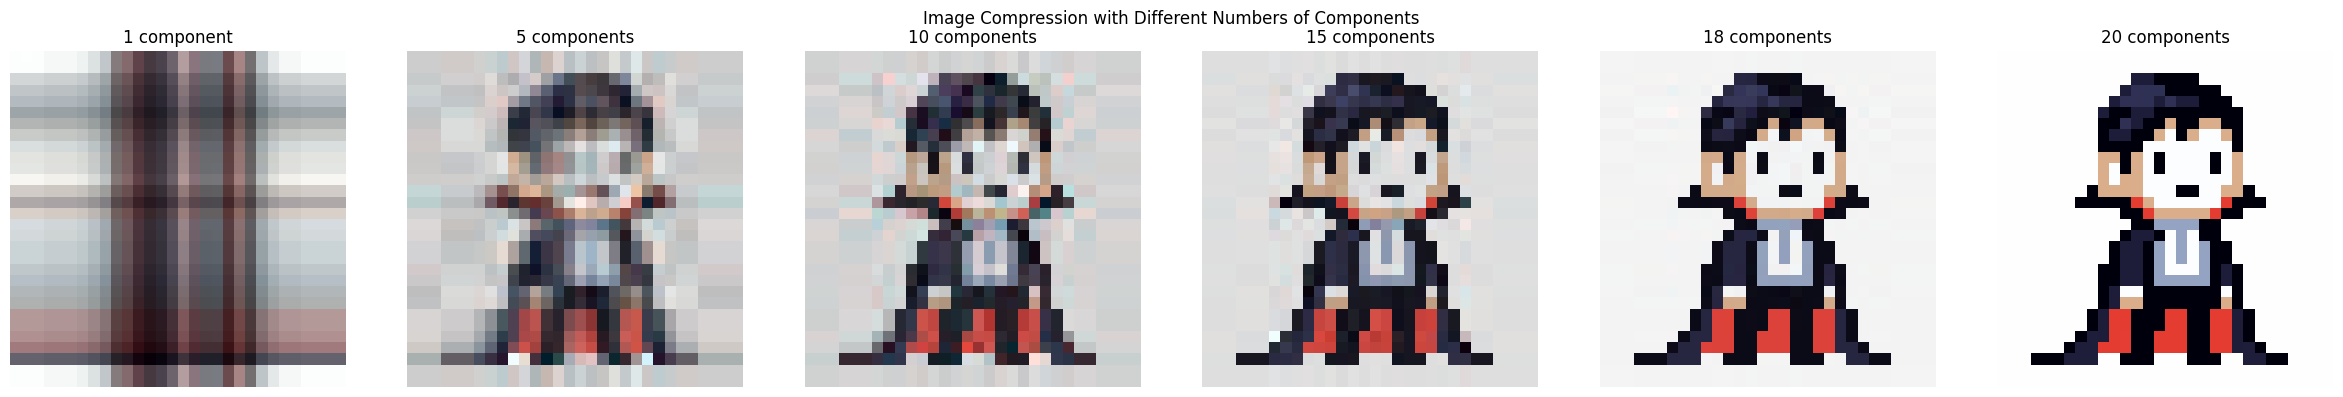

In [16]:
components_to_display = [1, 5, 10, 15,18,20]   # dont exceed max_components

fig, axes = plt.subplots(1, len(components_to_display), figsize=(len(components_to_display)*4, 4))
fig.suptitle("Image Compression with Different Numbers of Components")

for idx, no_component in enumerate(components_to_display):
    compressed_image = np.stack([
        np.sum(R_compressed[:no_component,:,:], axis=0),
        np.sum(G_compressed[:no_component,:,:], axis=0),
        np.sum(B_compressed[:no_component,:,:], axis=0)
    ])
    compressed_image = compressed_image.transpose(1, 2, 0)
    normalized_image = (compressed_image - compressed_image.min()) / (compressed_image.max() - compressed_image.min())
    clipped_image = np.clip(normalized_image, 0, 1)
    
    ax = axes[idx]
    ax.imshow(clipped_image)
    ax.axis('off')
    ax.set_title(f"{no_component} component{'s' if no_component > 1 else ''}")

plt.tight_layout()
plt.show()

In [18]:
import imageio
import numpy as np
import matplotlib.pyplot as plt

images = []
for no_component in range(max(components_to_display) + 1):
    compressed_image = np.stack([
        np.sum(R_compressed[:no_component,:,:], axis=0),
        np.sum(G_compressed[:no_component,:,:], axis=0),
        np.sum(B_compressed[:no_component,:,:], axis=0)
    ])
    compressed_image = compressed_image.transpose(1, 2, 0)
    
    min_val = compressed_image.min()
    max_val = compressed_image.max()
    if max_val > min_val:
        normalized_image = (compressed_image - min_val) / (max_val - min_val)
    else:
        normalized_image = np.zeros_like(compressed_image)
    
    clipped_image = np.clip(normalized_image, 0, 1)
    
    fig, ax = plt.subplots(figsize=(4, 4))
    ax.imshow(clipped_image)
    ax.axis('off')
    ax.set_title(f"{no_component} component{'s' if no_component > 1 else ''}")
    
    fig.canvas.draw()
    image = np.frombuffer(fig.canvas.buffer_rgba(), dtype='uint8')
    image = image.reshape(fig.canvas.get_width_height()[::-1] + (4,))[...,:3]  # Convert RGBA to RGB
    images.append(image)
    plt.close(fig)

imageio.mimsave('image_compression.gif', images, duration=5)